# Import библиотек

In [1]:
import pandas as pd
#from google.colab import files

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn import preprocessing as prep

pd.set_option("display.max_rows", 20)
pd.set_option("display.max_columns", 20)
pd.set_option("display.precision",6)
pd.set_option("plotting.backend", "matplotlib")

#Для корректного отображения графиков в ноутбуках используется команда %matplotlib inline
%matplotlib inline
# для корректного отображения графиков на тёмном фоне
plt.style.use('default')

# Загрузка данных

In [2]:
df = pd.read_csv('./content/cars_moldova.csv', delimiter = ',')
df

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro)
0,Toyota,Prius,2011,Hatchback,195000.0,1800.0,Hybrid,Automatic,7750.0
1,Renault,Grand Scenic,2014,Universal,135000.0,1500.0,Diesel,Manual,8550.0
2,Volkswagen,Golf,1998,Hatchback,1.0,1400.0,Petrol,Manual,2200.0
3,Renault,Laguna,2012,Universal,110000.0,1500.0,Diesel,Manual,6550.0
4,Opel,Astra,2006,Universal,200000.0,1600.0,Metan/Propan,Manual,4100.0
...,...,...,...,...,...,...,...,...,...
41002,Dacia,Logan Mcv,2015,Universal,89000.0,1500.0,Diesel,Manual,7000.0
41003,Renault,Modus,2009,Hatchback,225.0,1500.0,Diesel,Manual,4500.0
41004,Mercedes,E Class,2016,Sedan,50000.0,1950.0,Diesel,Automatic,29500.0
41005,Mazda,6,2006,Combi,370000.0,2000.0,Diesel,Manual,4000.0


# Информация о данных

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41007 entries, 0 to 41006
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  41007 non-null  object 
 1   Model                 41007 non-null  object 
 2   Year                  41007 non-null  int64  
 3   Style                 41007 non-null  object 
 4   Distance              41007 non-null  float64
 5   Engine_capacity(cm3)  41007 non-null  float64
 6   Fuel_type             41007 non-null  object 
 7   Transmission          41007 non-null  object 
 8   Price(euro)           41007 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 2.8+ MB


Пропусков данных нет.
Столбцы, содержащие количественные данные, имеют целый либо вещественный тип. Тип данных для них автоматически правильно определился, и некорректных данных (с точки зрения типа) в этих столбцах нет.
Поля с числовыми данными:

In [4]:
# Список количественных признаков
num_columns=[column_name for  column_name in  df.columns if  df[column_name].dtype == np.float64 or df[column_name].dtype == np.int64]
num_columns

['Year', 'Distance', 'Engine_capacity(cm3)', 'Price(euro)']

In [5]:
df.describe()

,Year,Distance,Engine_capacity(cm3),Price(euro)
count,41007.000000,4.100700e+04,41007.000000,4.100700e+04
mean,2007.976175,4.567353e+05,1853.856732,9.727109e+03
std,8.241487,4.451897e+06,700.364532,5.043926e+04
min,1900.000000,0.000000e+00,0.000000,1.000000e+00
25%,2004.000000,8.750000e+04,1500.000000,3.500000e+03
50%,2009.000000,1.680000e+05,1800.000000,6.600000e+03
75%,2014.000000,2.300000e+05,2000.000000,1.215000e+04
max,2021.000000,1.000000e+08,9999.000000,1.000000e+07


В столбце "Price" наблюдается значительное смещение среднего значения относительно медианы. Можно сделать вывод о наличии какой-то аномалии в данных или выбросов.

# Подготовка данных
## Поиск Дубликатов
Удалим дубликаты и аномалии.
Количество дубликатов:

In [6]:
df.duplicated().sum()

3743

## Удаление дубликатов

In [7]:
df = df.drop_duplicates()
df = df.reset_index(drop=True)
df.duplicated().sum()

0

## Удаление аномальных данных

In [8]:
df=df.drop(df[df.Distance>0.6e6].index)
df = df.drop(df[(df.Year<1970)].index)
df = df.drop(df[df["Price(euro)"] > 50000].index)
df = df.drop(df[(df["Price(euro)"] < 501)].index)
df = df.drop(df[(df.Distance <= 0)].index)
df = df.drop(df[(df.Distance < 50) & (df.Year<2021)].index)
df = df.drop( df[df["Engine_capacity(cm3)"] < 700].index)
df = df.drop(df[df["Engine_capacity(cm3)"] > 5000].index)

df = df.reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32918 entries, 0 to 32917
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  32918 non-null  object 
 1   Model                 32918 non-null  object 
 2   Year                  32918 non-null  int64  
 3   Style                 32918 non-null  object 
 4   Distance              32918 non-null  float64
 5   Engine_capacity(cm3)  32918 non-null  float64
 6   Fuel_type             32918 non-null  object 
 7   Transmission          32918 non-null  object 
 8   Price(euro)           32918 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 2.3+ MB


In [9]:
# Сохранение DataFrame в файл
df.to_csv('./content/cars_moldova_hw1_clean.csv',index=False)

# Визуализация данных
## Гистограмма

Гистограмма


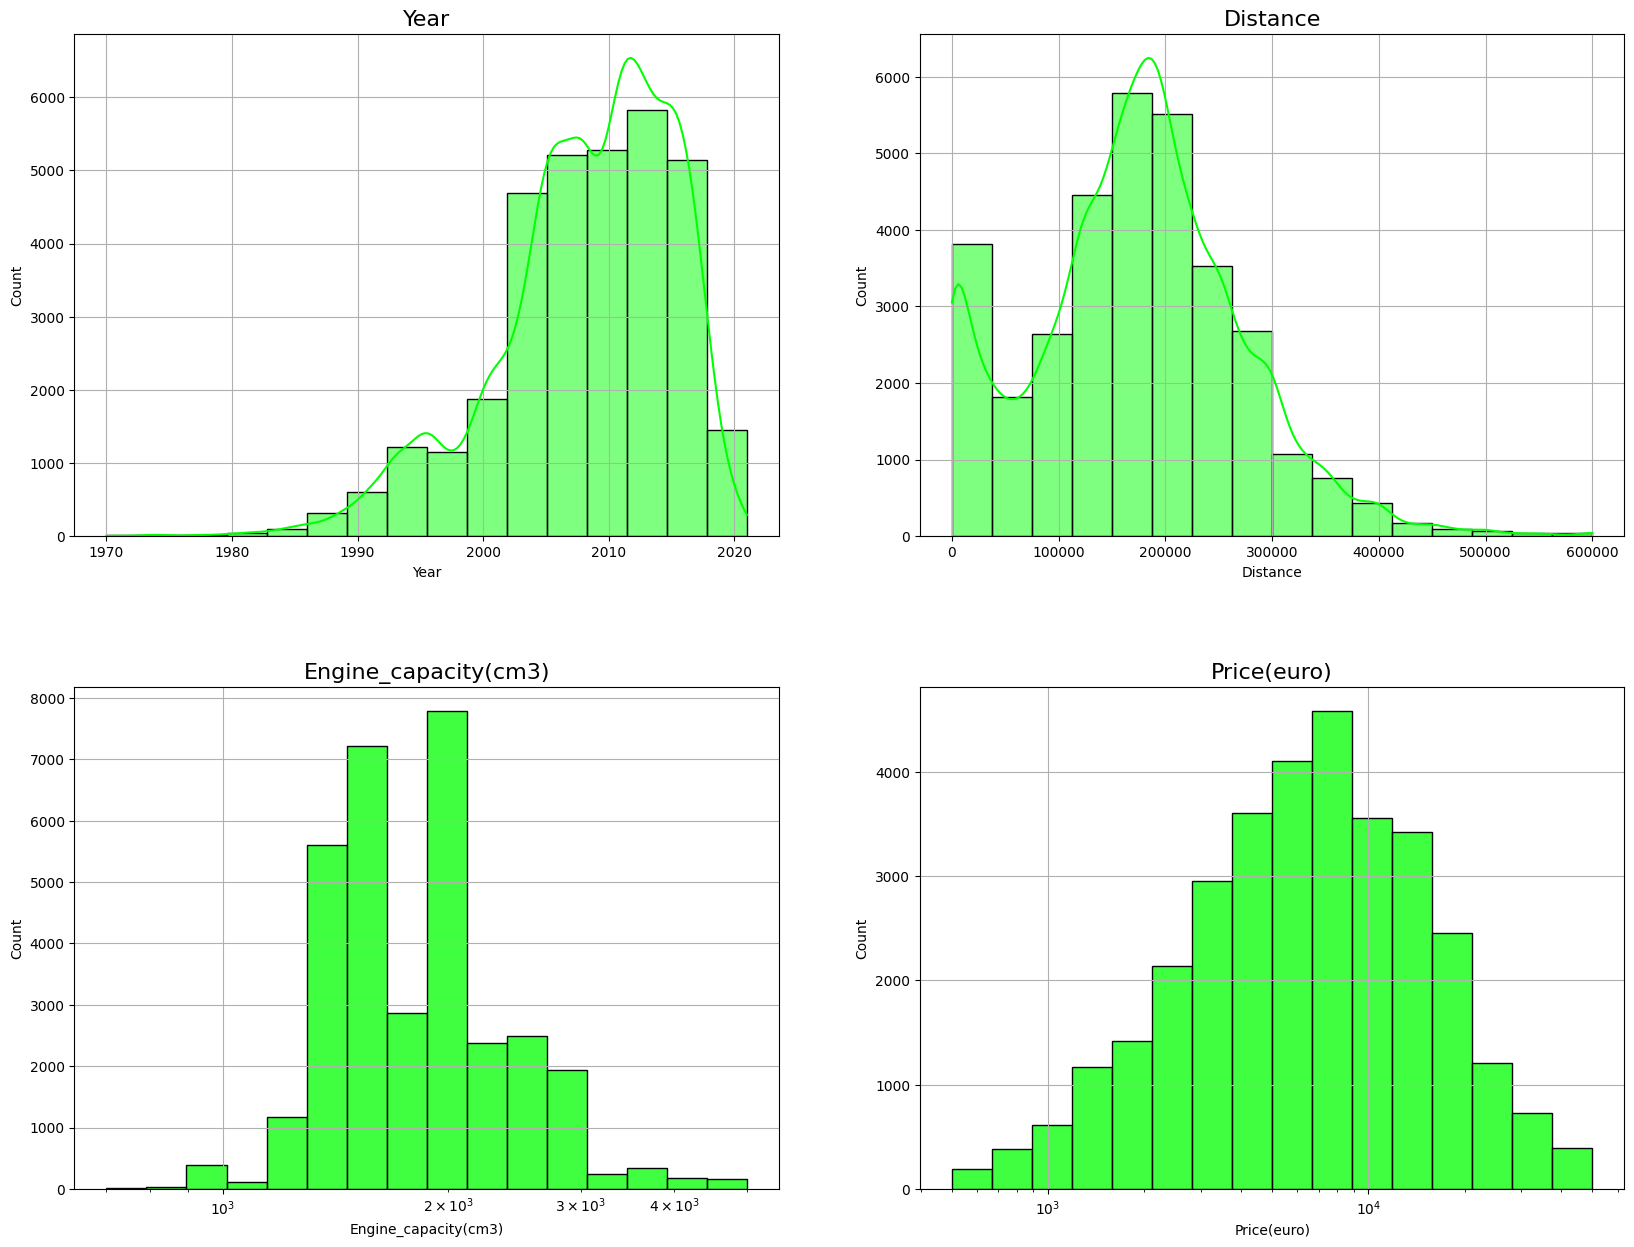

In [10]:
def get_log_scale(column_name):
    """
    Определяет, необходимо ли выполнить для столбца логарифмирование
    :param column_name: Название столбца
    :return: True или False
    """
    if column_name in [ 'Price(euro)', 'Engine_capacity(cm3)']:
        return True
    else:return False

num=-1
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))
plt.subplots_adjust(hspace=.3)
print("Гистограмма")

for column_name in num_columns:
    num = num+1
    x=num//2
    y=num -2*x
    hplot = sns.histplot(data=df, x=column_name, bins=16, kde=not get_log_scale(column_name), color='lime', log_scale = get_log_scale(column_name), ax=axes[x,y])
    hplot.set_title(column_name, fontsize=16)
    hplot.grid()


In [11]:
df.describe()

,Year,Distance,Engine_capacity(cm3),Price(euro)
count,32918.000000,32918.000000,32918.000000,32918.000000
mean,2008.186828,173218.604411,1888.695577,8892.149614
std,7.136249,98070.008929,565.819515,7758.053787
min,1970.000000,1.000000,700.000000,501.000000
25%,2004.000000,112000.000000,1500.000000,3500.000000
50%,2009.000000,175308.500000,1800.000000,6600.000000
75%,2014.000000,231000.000000,2000.000000,11800.000000
max,2021.000000,600000.000000,5000.000000,50000.000000


Анализ графиков показывает, что больше всего на вторичном рынке автомобилей 2004-2014 гг. выпуска, с пробегом от 108 тыс. км до 230 тыс. км, объемом двигателя от 1500 до 1800 куб см, и ценой от 3,5 тыс. до 12 тыс. евро. Оценим разброс цен для разных марок автомобилей.

## Ящик с усами Boxplot

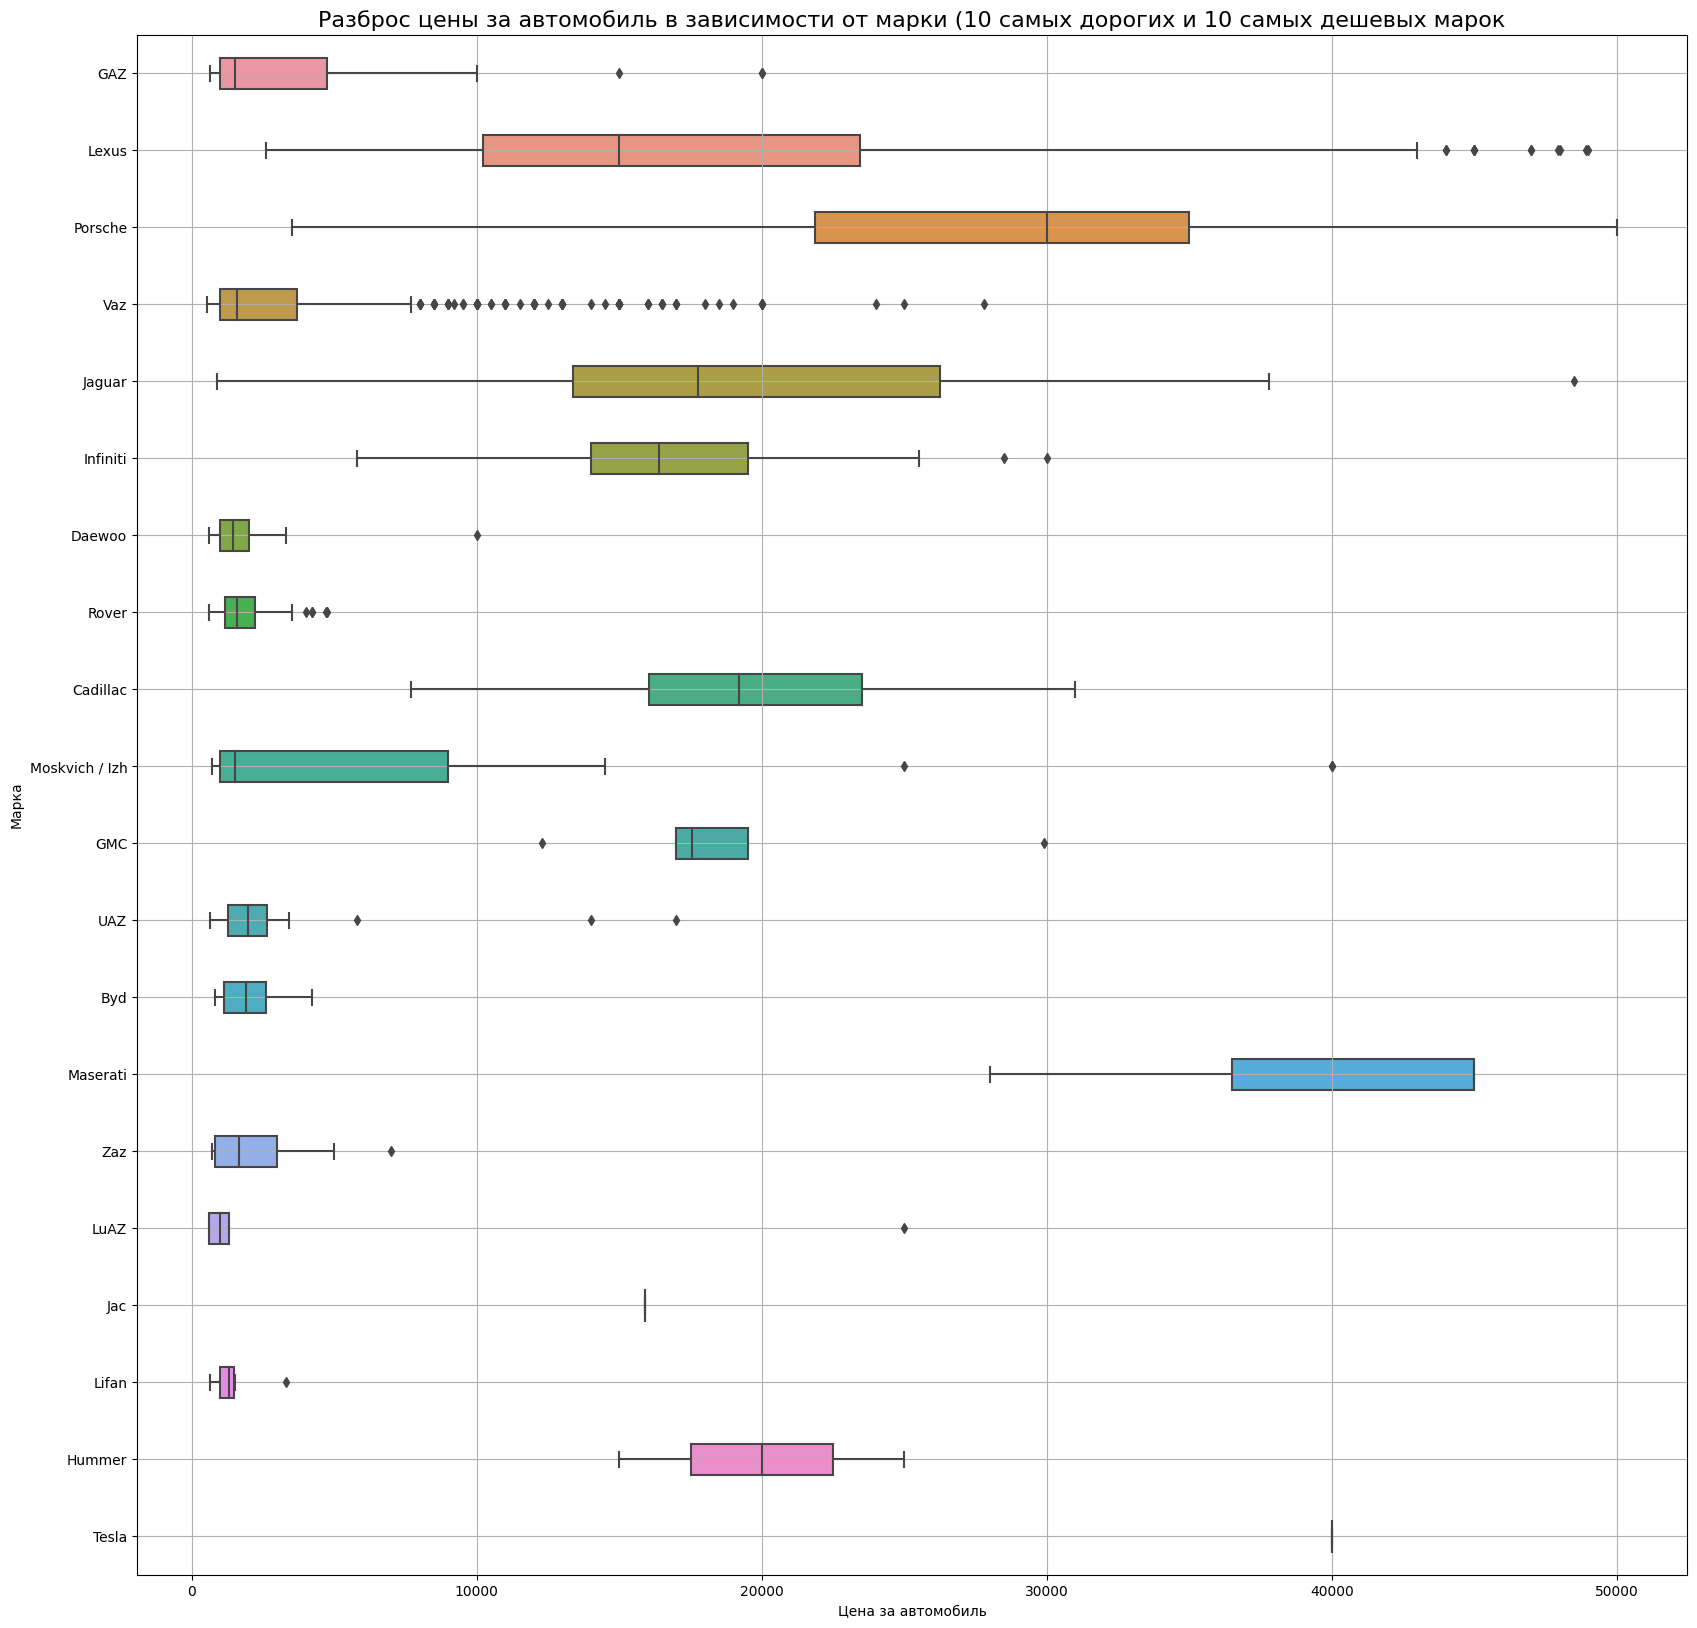

In [12]:
df1= df.groupby(['Make'] )['Price(euro)'].median().sort_values( ascending=False)
top_sub_manufactures=df1[:10].index.values.tolist()+df1[-10:].index.values.tolist()

fig = plt.figure(figsize=(20, 20))
boxplot = sns.boxplot(
    data=df[df['Make'].isin(top_sub_manufactures)],
    y='Make',
    x='Price(euro)',
    orient='h',
    width=0.4
)
boxplot.set_title('Разброс цены за автомобиль в зависимости от марки (10 самых дорогих и 10 самых дешевых марок', fontsize=16);
boxplot.set_xlabel('Цена за автомобиль');
boxplot.set_ylabel('Марка');
boxplot.grid()

График показывает разброс цен на б/у автомобили с самой низкой и самой высокой медианной ценой. Анализ графика показывает, что цена автомобиля очень сильно зависит от его марки. Большой размер ящика и наличие длинных "усов" у некоторых марок говорят о высокой волатильности цены, что является следствием небольшого присутствия и ограниченного предложения данной марки на рынке. Это является признаком низкой ликвидности модели, рекомендовать к покупке такие автомобили нельзя.

Для построения остальных графиков необходимы новые признаки, поэтому они представлены в следующих разделах.

# Добавление новых признаков
## Признак - регион производства

Посмотрим, а какие вообще марки есть на молдавском рынке:

In [13]:
df.Make.value_counts()

Volkswagen    3531
Toyota        3171
Mercedes      3037
BMW           2580
Renault       2448
              ... 
Jac              1
Zotye            1
Tata             1
Saturn           1
Tesla            1
Name: Make, Length: 79, dtype: int64

Видим, что на молдавском рынке продаются даже такие экспонаты, как Заз, Луаз, Ваз и т.п. , а также артефакты китайского автопрома. Но не все так печально на молдавском рынке. Есть и достойные марки. Проанализируем качественный состав автомобилей на вторичном рынке в Молдавии.
Введем новый признак: страна производства. Выделим: японские (japan), европейские (european), американские (american), китайские (chinese), корейский (korean), российские (russian) и прочие автомобили:

In [14]:
def get_brand_country(make_name):
    """
    Определяет регион или страну прозводства автомобиля по его марке
    :param make_name:  Название марки
    :return: Название страны или региона
    """
    if make_name in (['Lexus', 'Toyota', 'Nissan', 'Honda', 'Mitsubishi', 'Mazda', 'Subaru', 'Infiniti', 'Daihatsu', 'Acura', 'Isuzu', 'Datsun', 'Suzuki', 'Scion']):
        return "japan"
    elif make_name in (['Volkswagen', 'Mercedes', 'BMW', 'Renault', 'Opel', 'Skoda', 'Audi', 'Dacia', 'Volvo', 'Peugeot', 'Land Rover', 'Seat', 'Porsche', 'Fiat', 'Rover', 'Jaguar', 'Alfa Romeo', 'Lancia', 'Maserati', 'Citroen', 'Mini', 'Smart', 'Saab', 'ARO', 'Abarth']):
        return "european"
    elif make_name in (['Ford','Chrysler', 'Jeep', 'Lincoln', 'Dodge' , 'Cadillac', 'Buick', 'GMC', 'Mercedes-Maybach', 'Chevrolet', 'Pontiac', 'Hummer', 'Saturn', 'Tesla']):
        return "american"
    elif make_name in (['Hyundai', 'KIA', 'Daewoo', 'Ssangyong']):
        return "korean"
    elif make_name in (['Chery', 'Great Wall', 'Byd', 'Brilliance', 'Lifan', 'Geely', 'Changan', 'Haima', 'Jac', 'Faw', 'Haval', 'Groz', 'Zotye']):
        return "chinese"
    elif make_name in (['Vaz', 'GAZ', 'UAZ']):
        return "russian"
    else:
        return "others"

df['Brand_country']=df.apply(lambda r: get_brand_country(r.Make), axis=1)
df['Brand_country']=df.Brand_country.astype('category')

### Круговая диаграмма (Pie Chart)

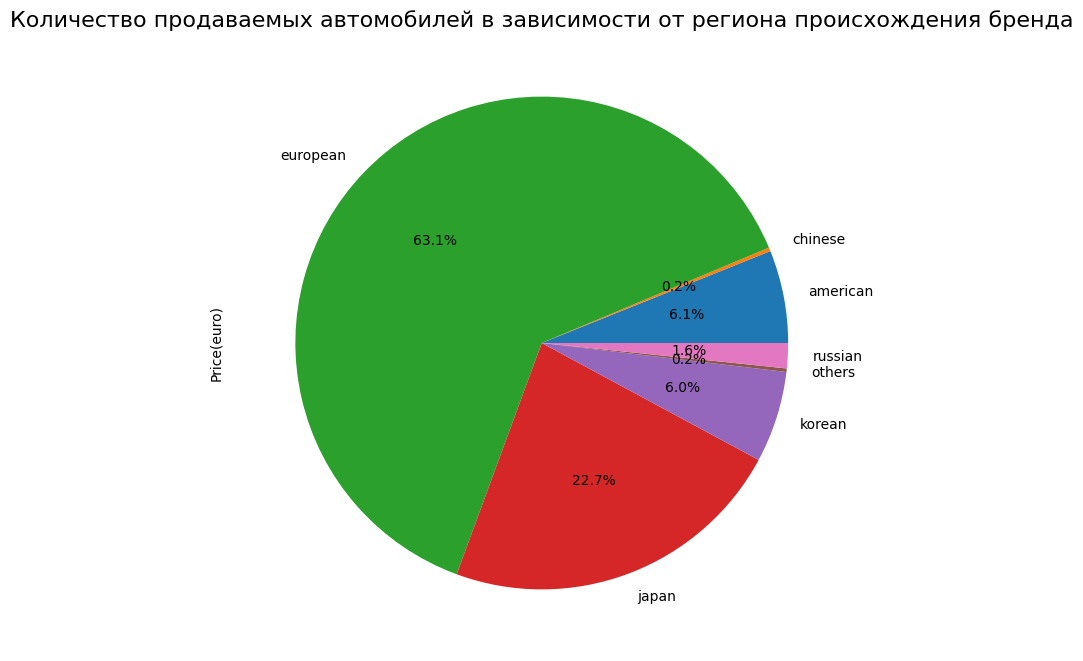

In [15]:
plot_data=df.groupby('Brand_country')["Price(euro)"].count().plot(
    kind='pie',
    figsize=(30, 8),
    grid = True,
    autopct='%.1f%%'
);
plot_data.set_title('Количество продаваемых автомобилей в зависимости от региона происхождения бренда', fontsize=16);


Видим, что больше всего автомобилей на вторичном рынке имеют европейское происхождение. На втором месте - японские. Третье место делят  американские и корейские автомобили. Ситуация, характерная для любой среднеевропейской страны. Есть также небольшой процент российских автомобилей, и очень маленький процент - китайских.

### Диаграмма рассеяния (scatterplot)
Оценим, как активно и по какой цене покупают автомобили из первых четырех категорий

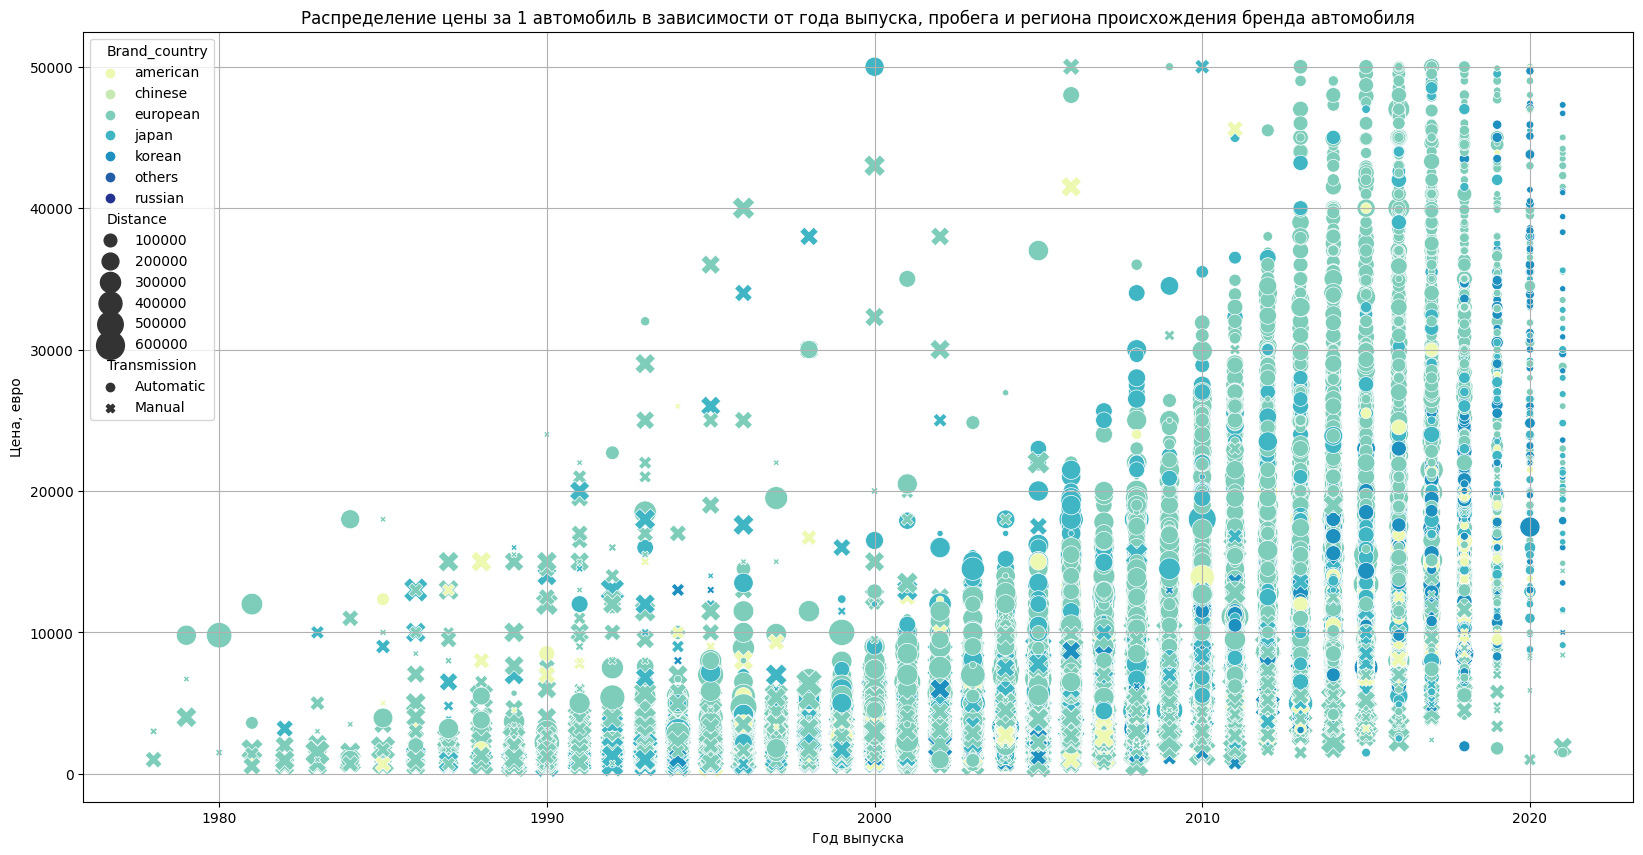

In [16]:
#selected_sub_areas=[sub_areas.head(1).index.values[0], top_sub_areas[0], top_sub_areas[-1]]
fig = plt.figure(figsize=(20, 10))
#df1.Brand_country.cat.remove_unused_categories()
plot_data=sns.scatterplot(data=df[df.Brand_country.isin(['japan', 'european', 'american', 'korean'])],
                          x='Year',
                          y='Price(euro)',
                          style='Transmission',
                          hue="Brand_country",
                          palette="YlGnBu",
                          size="Distance",
                          sizes=(20, 400));
plot_data.set_title('Распределение цены за 1 автомобиль в зависимости от года выпуска, пробега и региона происхождения бренда автомобиля');
plot_data.set_xlabel('Год выпуска');
plot_data.set_ylabel('Цена, евро');
plot_data.grid()

Видим, что цена растет по мере уменьшения возраста машины.  Также можно проследить уменьшение пробега по мере снижения возраста автомобиля.
График интересный и, несомненно, очень полезный, но плохо читаемый. Упростим его.

## Признаки - возраст и возрастная группа автомобиля

In [17]:
# Возраст
df['Age']=2023-df.Year

In [18]:
# Возрастная группа
df['Age_group']= pd.cut(df.Age, bins=10, precision =0, ordered=True)
counts = df['Age_group'].value_counts(normalize=True , sort=False)
counts

(2.0, 7.0]      0.141503
(7.0, 12.0]     0.301081
(12.0, 17.0]    0.252992
(17.0, 22.0]    0.165350
(22.0, 28.0]    0.068990
(28.0, 33.0]    0.051218
(33.0, 38.0]    0.013518
(38.0, 43.0]    0.003888
(43.0, 48.0]    0.000881
(48.0, 53.0]    0.000577
Name: Age_group, dtype: float64

Анализ данных показывает, что последние 4 категории можно свести в одну ввиду их немногочисленности:

In [19]:
age_bins= np.linspace(df.Age.min()*0.95, df.Age.max()*1.05, 11)
age_bins=age_bins[[0,1,2,3,4,5,6,10]]
df['Age_group']= pd.cut(df.Age, bins=age_bins, precision =0, ordered=True)
df['Age_group'].value_counts(normalize=True , sort=False)

(2.0, 7.0]      0.141503
(7.0, 13.0]     0.301081
(13.0, 18.0]    0.305152
(18.0, 23.0]    0.133939
(23.0, 29.0]    0.062519
(29.0, 34.0]    0.044717
(34.0, 56.0]    0.011088
Name: Age_group, dtype: float64

### Круговая диаграмма возрастной группы автомобиля (Pie Chart)

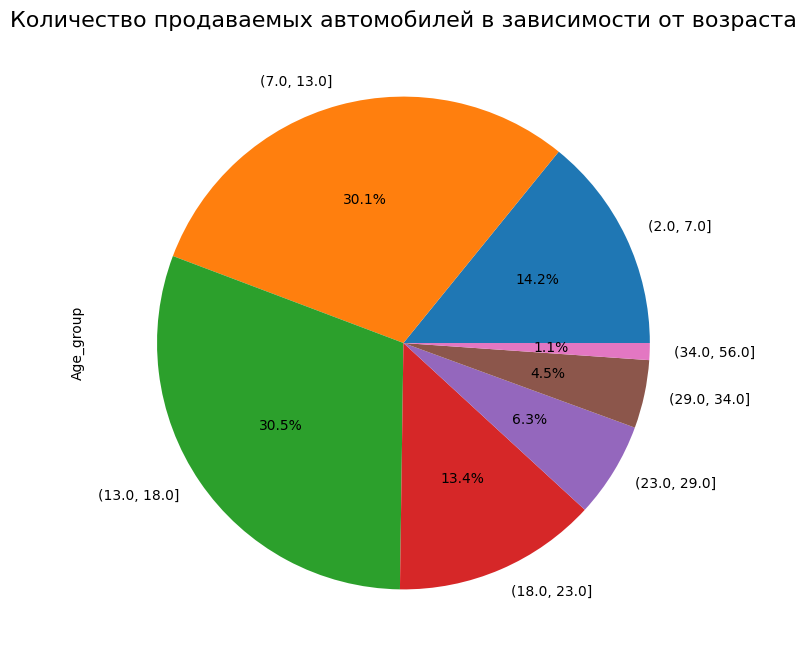

In [21]:
plot_data=df['Age_group'].value_counts(normalize=True , sort=False).plot(
    kind='pie',
    figsize=(30, 8),
    grid = True,
    autopct='%.1f%%'
);
plot_data.set_title('Количество продаваемых автомобилей в зависимости от возраста', fontsize=16);

Больше всего продается автомобилей в возрасте от 7 до 12 лет.

### Корреляция признаков (heatmap)

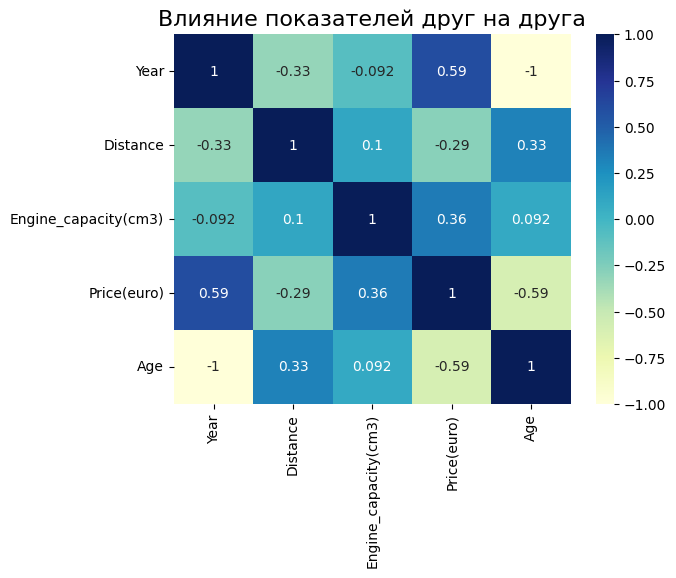

In [22]:
num_columns=[column_name for  column_name in  df.columns if  df[column_name].dtype == np.float64 or df[column_name].dtype == np.int64]
plot_data = sns.heatmap(df[num_columns].corr(), cmap="YlGnBu", annot=True);
plot_data.set_title('Влияние показателей друг на друга', fontsize=16);

Коэффициент корреляции между числовыми признаками Age и Year ожидаемо равен 1, поскольку один получен из другого с целью замены одного на другой.
Зато нет практически никакой связи между объемом двигателя и пробегом,  объемом двигателя и возрастом автомобиля, но вот получить из них новый признак, который имел бы хоть какой-то смысл, не представляется возможным.
Анализ графика показывает, что признак Year можно удалить:

In [23]:
# Удаляем признак Year
del df['Year']

# Переопределяем список количественных признаков
num_columns=[column_name for  column_name in  df.columns if  df[column_name].dtype == np.float64 or df[column_name].dtype == np.int64]
num_columns

['Distance', 'Engine_capacity(cm3)', 'Price(euro)', 'Age']

In [24]:
cm = sns.color_palette("vlag", as_cmap=True)
df[num_columns].corr().style.background_gradient(cmap=cm, vmin = -1, vmax=1)

,Distance,Engine_capacity(cm3),Price(euro),Age
Distance,1.000000,0.102057,-0.285673,0.327223
Engine_capacity(cm3),0.102057,1.000000,0.357639,0.091915
Price(euro),-0.285673,0.357639,1.000000,-0.594234
Age,0.327223,0.091915,-0.594234,1.000000


## Признак - степень изношенности

Степень изношенности будем оценивать с помощью условной группы по величине пробега:

In [25]:
# Степень изношенности
df['Wear']= pd.cut(df.Distance, bins=10, precision =0, ordered=True)
df['Wear'].value_counts(normalize=True , sort=False)

(-599.0, 60001.0]       0.149645
(60001.0, 120001.0]     0.123155
(120001.0, 180001.0]    0.257610
(180001.0, 240001.0]    0.245550
(240001.0, 300000.0]    0.142536
(300000.0, 360000.0]    0.050702
(360000.0, 420000.0]    0.019503
(420000.0, 480000.0]    0.006592
(480000.0, 540000.0]    0.002764
(540000.0, 600000.0]    0.001944
Name: Wear, dtype: float64

Больше всего на рынке автомобилей с пробегом от 120 до 240 тыс. км.
Очевидно, что автомобилей с пробегом более 360тыс км значительно меньше всех остальных. Поэтому объединим их в одну группу:

In [26]:
distance_bins= np.linspace(df.Distance.min()*0.95, df.Distance.max()*1.05, 11)
distance_bins=distance_bins[[0,1,2,3,4,5,6,10]]
df['Wear']= pd.cut(df.Distance, bins=distance_bins, precision =0, ordered=True)
df['Wear'].value_counts(normalize=True , sort=False)

(1.0, 63001.0]          0.153290
(63001.0, 126001.0]     0.148521
(126001.0, 189001.0]    0.268637
(189001.0, 252001.0]    0.243028
(252001.0, 315000.0]    0.117656
(315000.0, 378000.0]    0.043593
(378000.0, 630000.0]    0.025275
Name: Wear, dtype: float64

### Диаграмма рассеяния (scatterplot)
Снова оценим, как активно и по какой цене покупают автомобили из первых четырех категорий

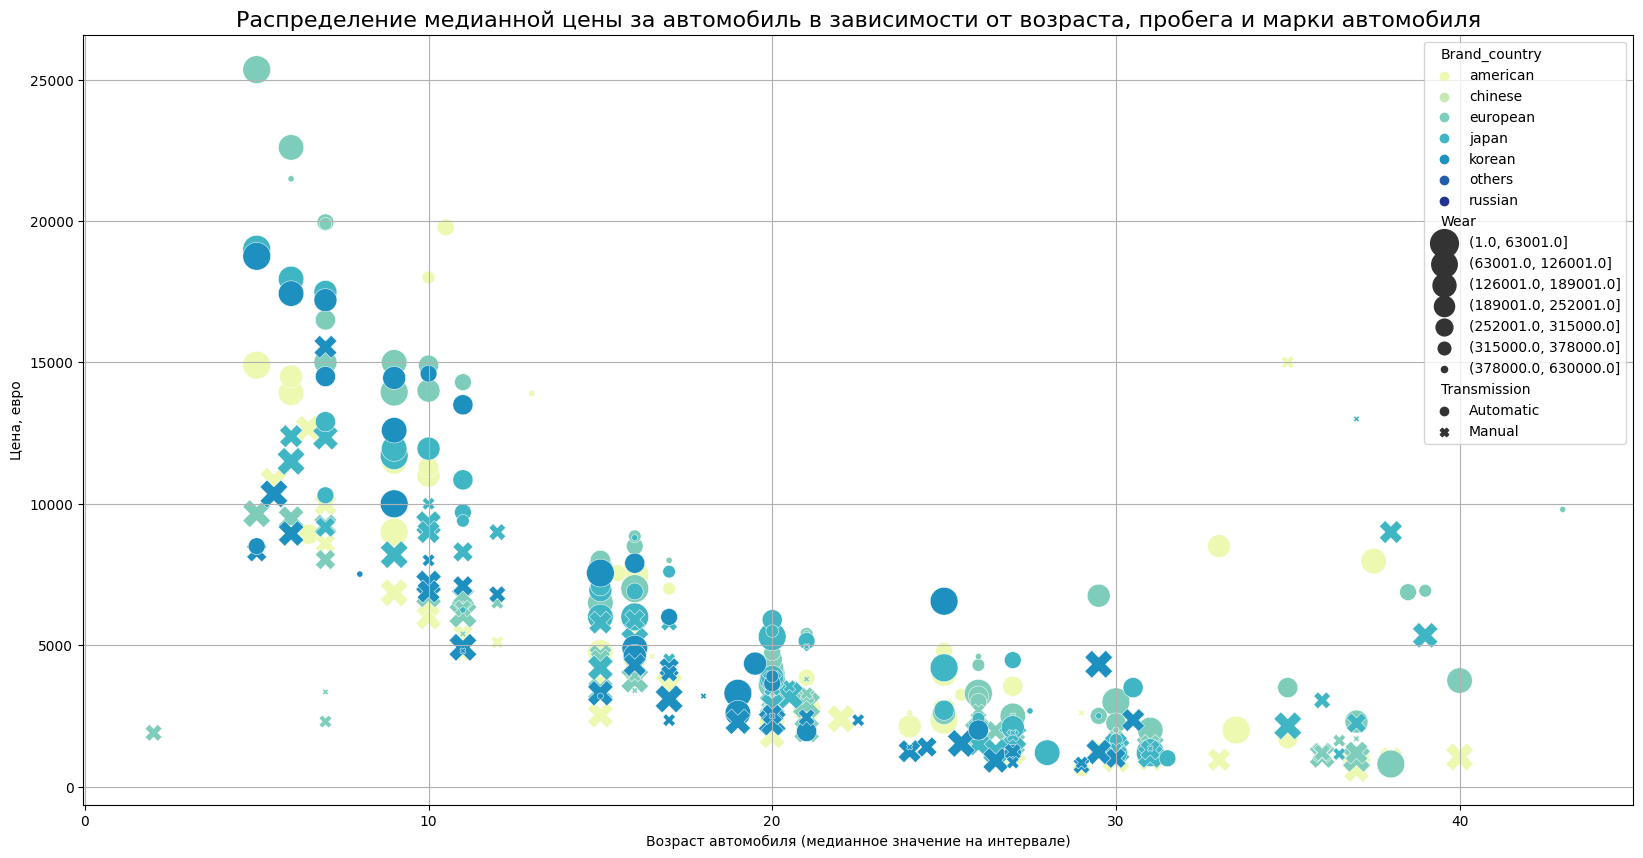

In [27]:
#selected_sub_areas=[sub_areas.head(1).index.values[0], top_sub_areas[0], top_sub_areas[-1]]
df2=df[df.Brand_country.isin(['japan', 'european', 'american', 'korean'])].groupby(['Brand_country', 'Age_group', 'Wear', 'Transmission'] , as_index=False)[['Price(euro)', 'Age','Distance']].median()
df2.dropna(inplace=True)

fig = plt.figure(figsize=(20, 10))
plot_data=sns.scatterplot(data=df2,
                          x='Age',
                          y='Price(euro)',
                          style='Transmission',
                          hue="Brand_country",
                          palette="YlGnBu",
                          size="Wear",
                          sizes=(20, 400));
plot_data.set_title('Распределение медианной цены за автомобиль в зависимости от возраста, пробега и марки автомобиля', fontsize=16);
plot_data.set_xlabel('Возраст автомобиля (медианное значение на интервале)');
plot_data.set_ylabel('Цена, евро');
plot_data.grid()

После упрощения графика становится очевидно, цена на автомобили с автоматической коробкой передач немного выше, чем с механической;  с увеличением возраста автомобиля увеличивается износ (хотя зависимость не очень явная), а цена падает, при этом вариативность цены с возрастом уменьшается, а разница в бренде и коробке передач с возрастом нивелируется.
Наблюдается также неожиданный всплеск цен на некоторые старые автомобили. Также можно наблюдать отдельные всплески цен на американские автомобили.

## Анализ новых факторов

### Столбчатая диаграмма (bar chart)

Проанализируем количество, цену и пробег продаваемых автомобилей в каждой из добавленных категориях:

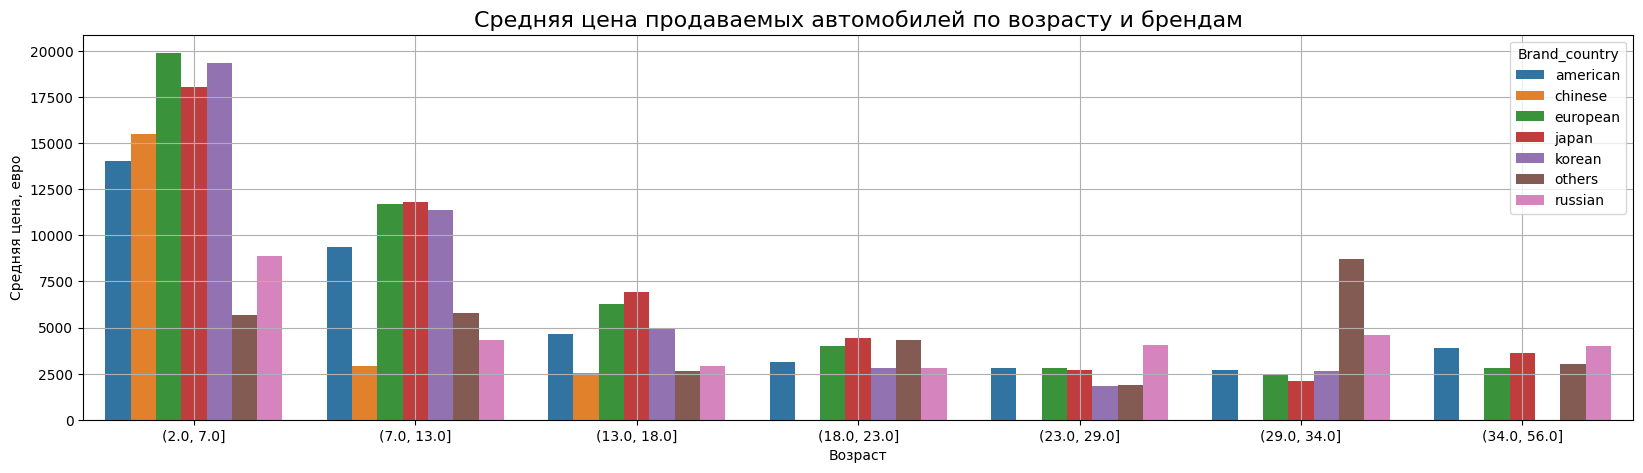

In [28]:
df2=df.groupby(['Brand_country', 'Age_group'] , as_index=False)[['Price(euro)', 'Age']].mean()
plt.figure(figsize=(20,5))
barplot = sns.barplot(
    data=df2,
    hue='Brand_country',
    y='Price(euro)',
    x='Age_group',
)

barplot.set_title('Средняя цена продаваемых автомобилей по возрасту и брендам', fontsize=16);
barplot.set_xlabel('Возраст');
barplot.set_ylabel('Средняя цена, евро');
barplot.grid()

### Линейный график (lineplot)

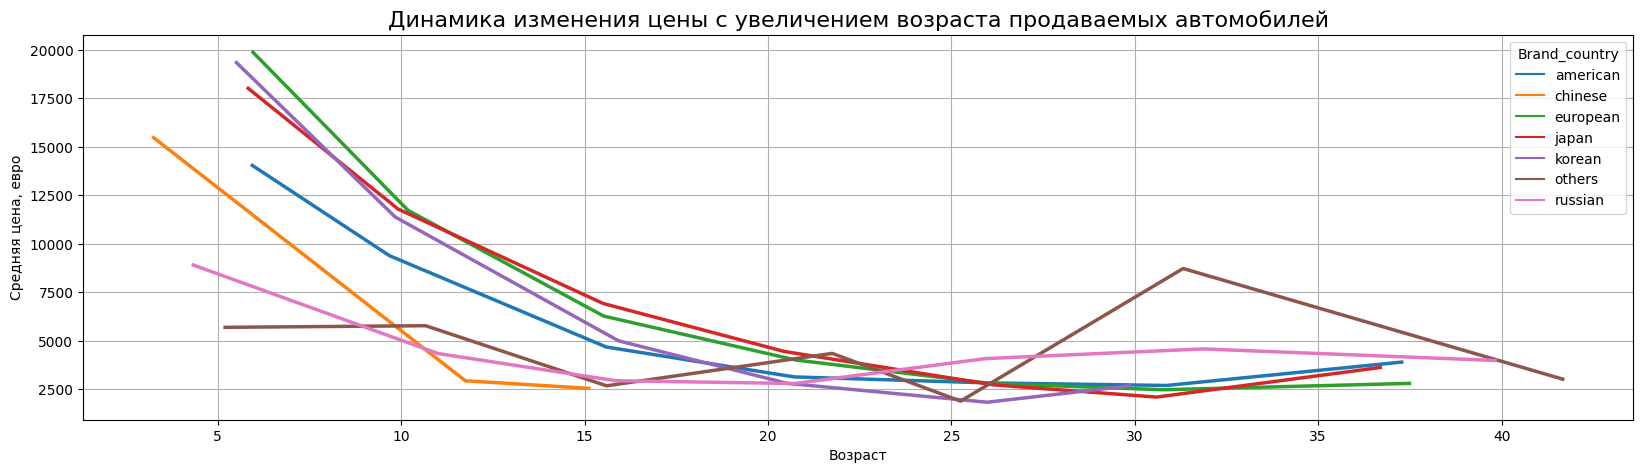

In [29]:
plt.figure(figsize=(20,5))
barplot=sns.lineplot(data=df2,x='Age', y='Price(euro)', hue='Brand_country', palette="tab10", linewidth=2.5)
barplot.set_title('Динамика изменения цены с увеличением возраста продаваемых автомобилей', fontsize=16);
barplot.set_xlabel('Возраст');
barplot.set_ylabel('Средняя цена, евро');
barplot.grid()

Анализ этих графиков показывает, что наибольшая цена - у автомобилей моложе 7 лет; цена убывает с возрастом, но только до 30 лет, потом она стабилизируется. При этом средняя цена более свежих автомобилей европейских брендов выше остальных брендов, американских - ниже. Самые дешевые, очевидно, российские и прочие бренды. Что удивительно, цена на свежего "европейца" почти равна цене свежего "корейца", а цена свежего "китайца" выше цены свежего "американца".
С возрастом разница в ценах почти нивелируется, но китайские модели теряют больше всех в цене, продавать их надо молодыми. На втором месте по потере в цене - это "европейцы" и "корейцы".  Относительно медленно теряют в цене "японцы"  и "американцы".  Меньше всего теряют российские и прочие бренды: вне зависимости от возраста они занимают нишу самых дешевых автомобилей, хотя в какой-то момент они начинают конкурировать за это почетное звание с китайскими брендами.

### Столбчатая диаграмма 2 (bar chart)
Оценим влияние изношенности на цену автомобиля.

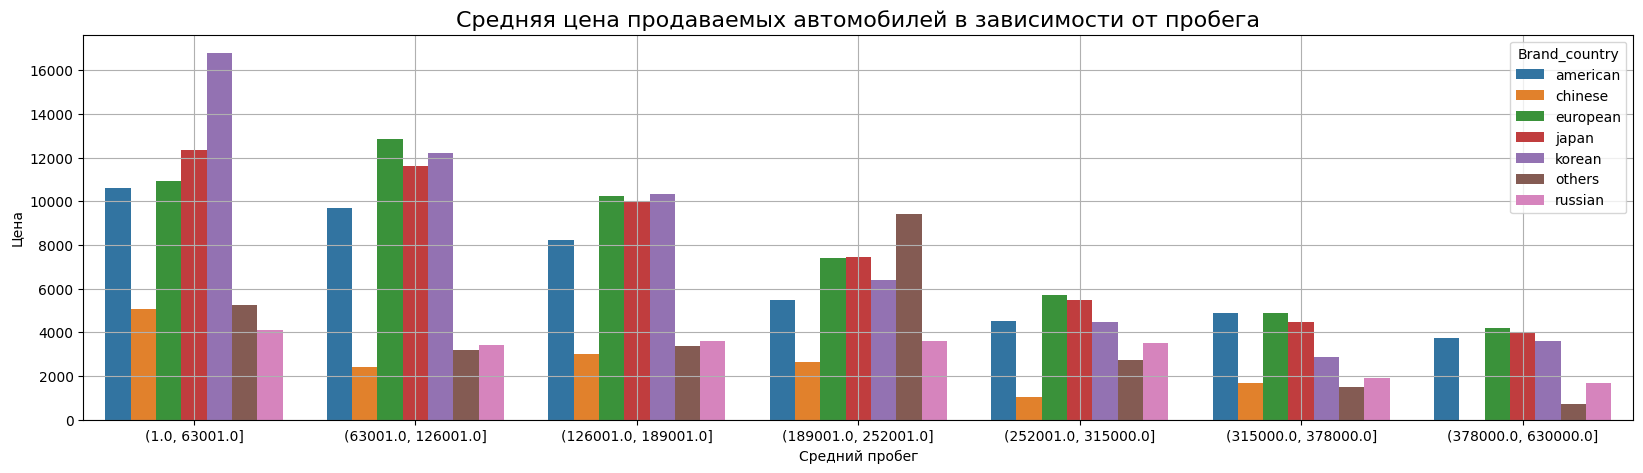

In [30]:
df2=df.groupby(['Brand_country', 'Wear'] , as_index=False)[['Price(euro)']].mean()
plt.figure(figsize=(20,5))
barplot = sns.barplot(
    data=df2,
    hue='Brand_country',
    y='Price(euro)',
    x='Wear',
)

barplot.set_title('Средняя цена продаваемых автомобилей в зависимости от пробега', fontsize=16);
barplot.set_xlabel('Средний пробег');
barplot.set_ylabel('Цена');
barplot.grid()

Ожидаемо, с увеличением пробега цена падает. Больше всего теряют в цене с увеличением пробега модели корейских и европейских брендов, меньше всех - автомобили российских брендов: они стабильно занимают самую низкую ценовую категорию. Китайские бренды очень сильно теряют в начале - на пробеге до 120 тыс. км, а потом отбирают пальму первенства по самой низкой цене у российских брендов. Достаточно плавное снижение цены можно наблюдать у японских и американских брендов.
Оценим интенсивность эксплуатации автомобилей разных брендов.

Оценим количество продаваемых автомобилей по возрасту и пробегу.

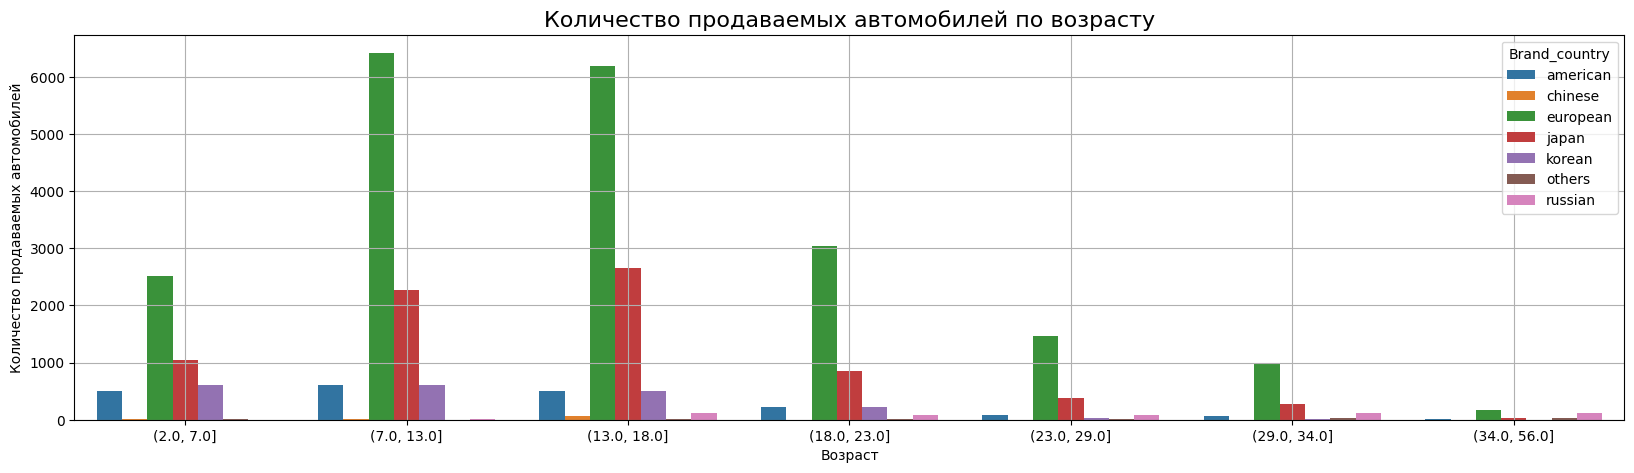

In [31]:
df2=df.groupby(['Brand_country', 'Age_group'] , as_index=False)['Price(euro)'].count()
plt.figure(figsize=(20,5))
barplot = sns.barplot(
    data=df2,
    x='Age_group',
    y='Price(euro)',
    hue='Brand_country',
)
barplot.set_title('Количество продаваемых автомобилей по возрасту', fontsize=16);
barplot.set_xlabel('Возраст');
barplot.set_ylabel('Количество продаваемых автомобилей');
barplot.grid()

Анализ этого графика показывает, что большая часть автомобилей на рынке - имеет возраст от 7 до 12 лет; с увеличением возраста автомобилей их количество на рынке уменьшается. Во всех возрастных группах по количеству продаваемых автомобилей пальма первенства принадлежит европейским моделям, на втором месте с большим отставанием - японские, на третьем - американские и корейские. Меньше всего китайских, российских  и прочих автомобилей.

## Сохранение DataFrame в файл

In [32]:
df.to_csv('./content/cars_moldova_hw1_features.csv',index=False)

# Предварительная Обработка


## Преобразование признаков типа Object в категориальные

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32918 entries, 0 to 32917
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Make                  32918 non-null  object  
 1   Model                 32918 non-null  object  
 2   Style                 32918 non-null  object  
 3   Distance              32918 non-null  float64 
 4   Engine_capacity(cm3)  32918 non-null  float64 
 5   Fuel_type             32918 non-null  object  
 6   Transmission          32918 non-null  object  
 7   Price(euro)           32918 non-null  float64 
 8   Brand_country         32918 non-null  category
 9   Age                   32918 non-null  int64   
 10  Age_group             32918 non-null  category
 11  Wear                  32918 non-null  category
dtypes: category(3), float64(3), int64(1), object(5)
memory usage: 2.4+ MB


В датасете имеется 5 признаков, которые можно преобразовать в тип 'category', а также 3 признака, у которых можно уменьшить количество категорий.

### Признак Style

Проанализируем распределение продаваемых автомобилей по форме кузова:

In [34]:
df.Style.value_counts()

Sedan        9932
Universal    6125
Hatchback    5355
Crossover    4038
SUV          3023
Minivan      2793
Coupe         586
Microvan      439
Combi         350
Cabriolet     133
Pickup        122
Roadster       22
Name: Style, dtype: int64

Преобразуем в категориальный тип:

In [35]:
df['Style']=df.Style.astype('category')
df.Style.value_counts()

Sedan        9932
Universal    6125
Hatchback    5355
Crossover    4038
SUV          3023
Minivan      2793
Coupe         586
Microvan      439
Combi         350
Cabriolet     133
Pickup        122
Roadster       22
Name: Style, dtype: int64

Больше всего продается седанов, на втором месте - универсалы, на  третьем - хэчбэки.

### Признак Model
Проанализируем распределение продаваемых автомобилей по моделям:

In [36]:
df.Model.value_counts()

E Class       1122
5 Series      1039
Passat         894
Megane         850
Astra          843
              ... 
Blazer           1
GW Peri          1
J7               1
Grand - Am       1
Siber            1
Name: Model, Length: 776, dtype: int64

Объединим все автомобили с количеством моделей меньше 200  и преобразуем в категориальный тип:

In [37]:
counts = df.Model.value_counts()
rare =  counts[(counts.values < 200)]
df['Model'] = df['Model'].replace(rare.index.values, 'Others')
df['Model']=df.Model.astype('category')
df.Model.value_counts()

Others       15138
E Class       1122
5 Series      1039
Passat         894
Megane         850
             ...  
Kadjar         225
Jetta          222
S Class        214
Outlander      204
Civic          204
Name: Model, Length: 43, dtype: int64

### Признак Make
Проанализируем распределение продаваемых автомобилей по производителям:

In [38]:
df.Make.value_counts()

Volkswagen    3531
Toyota        3171
Mercedes      3037
BMW           2580
Renault       2448
              ... 
Jac              1
Zotye            1
Tata             1
Saturn           1
Tesla            1
Name: Make, Length: 79, dtype: int64

Объединим всех производителей с количеством моделей меньше 1000  и преобразуем в категориальный тип:

In [39]:
counts = df.Make.value_counts()
rare =  counts[(counts.values < 100)]
df['Make'] = df['Make'].replace(rare.index.values, 'Others')
df['Make']=df.Make.astype('category')
df.Make.value_counts()

Volkswagen    3531
Toyota        3171
Mercedes      3037
BMW           2580
Renault       2448
              ... 
Land Rover     255
Fiat           195
Subaru         160
Suzuki         157
Porsche        147
Name: Make, Length: 29, dtype: int64

### Признаки Transmission и Fuel_type

Преобразуем в категориальный типы Transmission и Fuel_type

In [40]:
df['Fuel_type']=df.Fuel_type.astype('category')
df['Transmission']=df.Transmission.astype('category')
df.Fuel_type.value_counts()

Diesel            15627
Petrol            11315
Metan/Propan       3635
Hybrid             1881
Plug-in Hybrid      436
Electric             24
Name: Fuel_type, dtype: int64

In [41]:
df.Transmission.value_counts()

Manual       18174
Automatic    14744
Name: Transmission, dtype: int64

### Сохранение DataFrame в файл

In [42]:
df.to_csv('./content/cars_moldova_hw1_cat.csv',index=False)

In [43]:
# Результаты преобразования
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32918 entries, 0 to 32917
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Make                  32918 non-null  category
 1   Model                 32918 non-null  category
 2   Style                 32918 non-null  category
 3   Distance              32918 non-null  float64 
 4   Engine_capacity(cm3)  32918 non-null  float64 
 5   Fuel_type             32918 non-null  category
 6   Transmission          32918 non-null  category
 7   Price(euro)           32918 non-null  float64 
 8   Brand_country         32918 non-null  category
 9   Age                   32918 non-null  int64   
 10  Age_group             32918 non-null  category
 11  Wear                  32918 non-null  category
dtypes: category(8), float64(3), int64(1)
memory usage: 1.3 MB


## Преобразование категориальных признаков в числовые

In [44]:
# Запоминаем список количественных признаков
num_columns=[column_name for  column_name in  df.columns if  df[column_name].dtype == np.float64 or df[column_name].dtype == np.int64]
num_columns

['Distance', 'Engine_capacity(cm3)', 'Price(euro)', 'Age']

В результате выполненных преобразований в датасете появилось 8 категориальных признаков.
Для облегчения дальнейшей работы с ними 6 из них ('Model','Make', 'Style', 'Brand_country', 'Age_group', 'Wear') преобразуем в числовой тип, а для двух ('Fuel_type', 'Transmission') выполним One-Hot Encoding:

In [45]:
transformed_fields = ['Model','Make', 'Style', 'Brand_country', 'Age_group', 'Wear']

OrdinalEncoderFit = prep.OrdinalEncoder().fit(df[transformed_fields])
Ordinal_encoded = OrdinalEncoderFit.transform(df[transformed_fields])
Ordinal_encoded= pd.DataFrame(Ordinal_encoded, columns = OrdinalEncoderFit.feature_names_in_).astype(int)
Ordinal_encoded

,Model,Make,Style,Brand_country,Age_group,Wear
0,29,25,4,3,1,3
1,19,20,11,2,1,2
2,26,20,11,2,1,1
3,5,16,11,2,2,3
4,40,13,5,2,3,4
...,...,...,...,...,...,...
32913,26,10,3,2,3,3
32914,23,4,11,2,1,1
32915,26,20,4,2,2,0
32916,26,12,1,3,2,5


In [46]:
transformed_fields = ['Fuel_type', 'Transmission']

OneHotEncoderFit = prep.OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse=False).fit(df[transformed_fields])
OneHotEncoded = OneHotEncoderFit.transform(df[transformed_fields])
OneHotEncoded = pd.DataFrame(OneHotEncoded, columns = OneHotEncoderFit.get_feature_names_out()).astype(int)
numeric_encoded = pd.concat([Ordinal_encoded,OneHotEncoded], axis = 1)
numeric_encoded

,Model,Make,Style,Brand_country,Age_group,Wear,Fuel_type_Diesel,Fuel_type_Electric,Fuel_type_Hybrid,Fuel_type_Metan/Propan,Fuel_type_Petrol,Fuel_type_Plug-in Hybrid,Transmission_Manual
0,29,25,4,3,1,3,0,0,1,0,0,0,0
1,19,20,11,2,1,2,1,0,0,0,0,0,1
2,26,20,11,2,1,1,1,0,0,0,0,0,1
3,5,16,11,2,2,3,0,0,0,1,0,0,1
4,40,13,5,2,3,4,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32913,26,10,3,2,3,3,0,0,0,1,0,0,1
32914,23,4,11,2,1,1,1,0,0,0,0,0,1
32915,26,20,4,2,2,0,1,0,0,0,0,0,1
32916,26,12,1,3,2,5,1,0,0,0,0,0,1


In [47]:
# Сохранение DataFrame в файл
numeric_encoded.to_csv('./content/cars_moldova_hw1_numeric_encoded.csv',index=False)

## Стандартизация

In [48]:
Standard = prep.StandardScaler().fit(df[num_columns])
scaled = Standard.transform(df[num_columns])
df_standard = pd.DataFrame(scaled, columns= num_columns)
df_standard

,Distance,Engine_capacity(cm3),Price(euro),Age
0,0.222104,-0.156758,-0.147223,-0.394215
1,-0.389713,-0.686971,-0.044103,-0.814610
2,-0.644637,-0.686971,-0.301904,-0.534347
3,0.273089,-0.510233,-0.617709,0.306444
4,1.292784,0.550192,-0.696339,1.147235
...,...,...,...,...
32913,0.528012,-0.156758,-0.579039,0.866971
32914,-0.858773,-0.686971,-0.243899,-0.954742
32915,-1.764008,-0.686971,-0.566149,-0.113951
32916,2.006570,0.196717,-0.630599,0.306444


In [49]:
# Сохранение DataFrame в файл
df_standard.to_csv('./content/cars_moldova_hw1_df_standard.csv',index=False)

Гистограмма после стандартизации


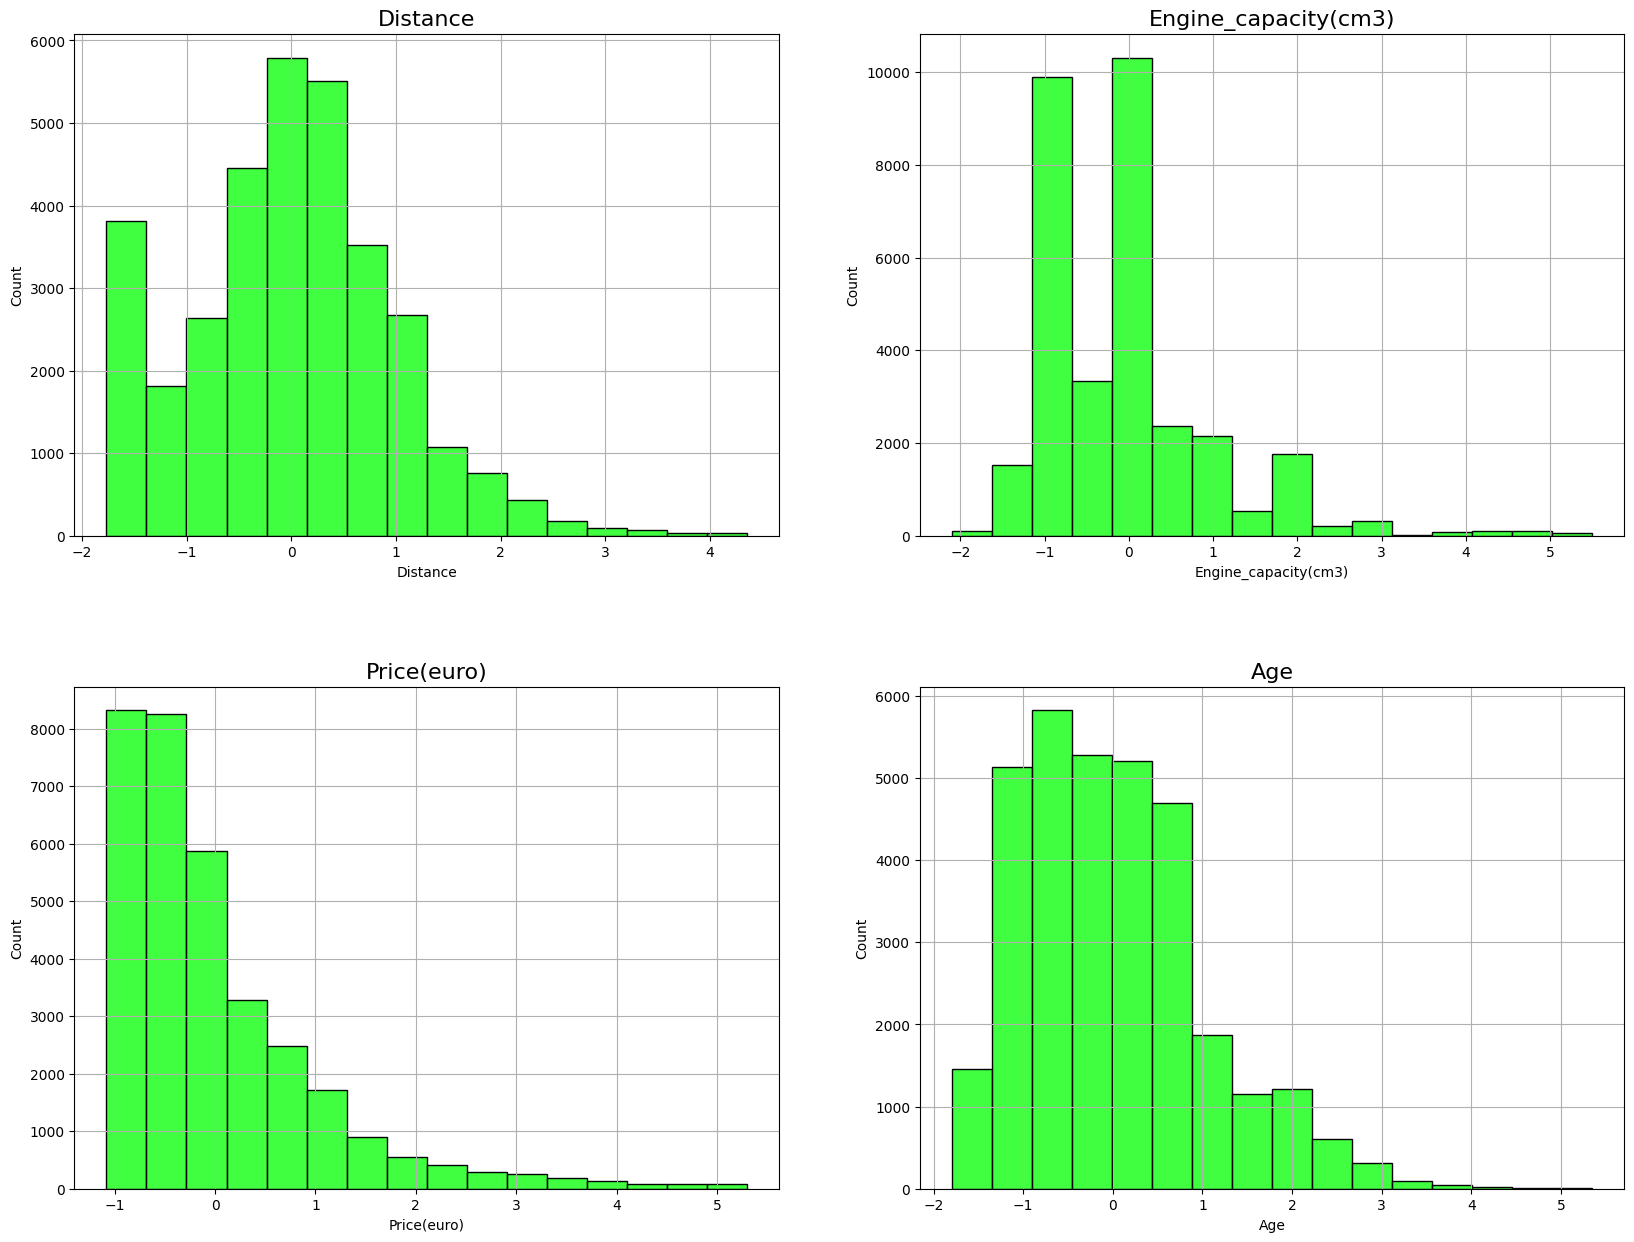

In [50]:
num=-1
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))
plt.subplots_adjust(hspace=.3)
print("Гистограмма после стандартизации")

for column_name in num_columns:
    num = num+1
    x=num//2
    y=num -2*x
    hplot = sns.histplot(data=df_standard, x=column_name, bins=16, color='lime', ax=axes[x,y])
    hplot.set_title(column_name, fontsize=16)
    hplot.grid()

## Нормализация

In [51]:
MinMaxScale = prep.MinMaxScaler().fit(df[num_columns])
scaled = MinMaxScale.transform(df[num_columns])
df_norm = pd.DataFrame(scaled, columns= num_columns)
df_norm

,Distance,Engine_capacity(cm3),Price(euro),Age
0,0.324999,0.255814,0.146447,0.196078
1,0.224999,0.186047,0.162609,0.137255
2,0.183332,0.186047,0.122204,0.176471
3,0.333332,0.209302,0.072709,0.294118
4,0.499999,0.348837,0.060385,0.411765
...,...,...,...,...
32913,0.374999,0.255814,0.078769,0.372549
32914,0.148332,0.186047,0.131296,0.117647
32915,0.000373,0.186047,0.080790,0.235294
32916,0.616666,0.302326,0.070688,0.294118


In [52]:
# Сохранение DataFrame в файл
df_norm.to_csv('./content/cars_moldova_hw1_df_norm.csv',index=False)

Гистограмма после нормализации


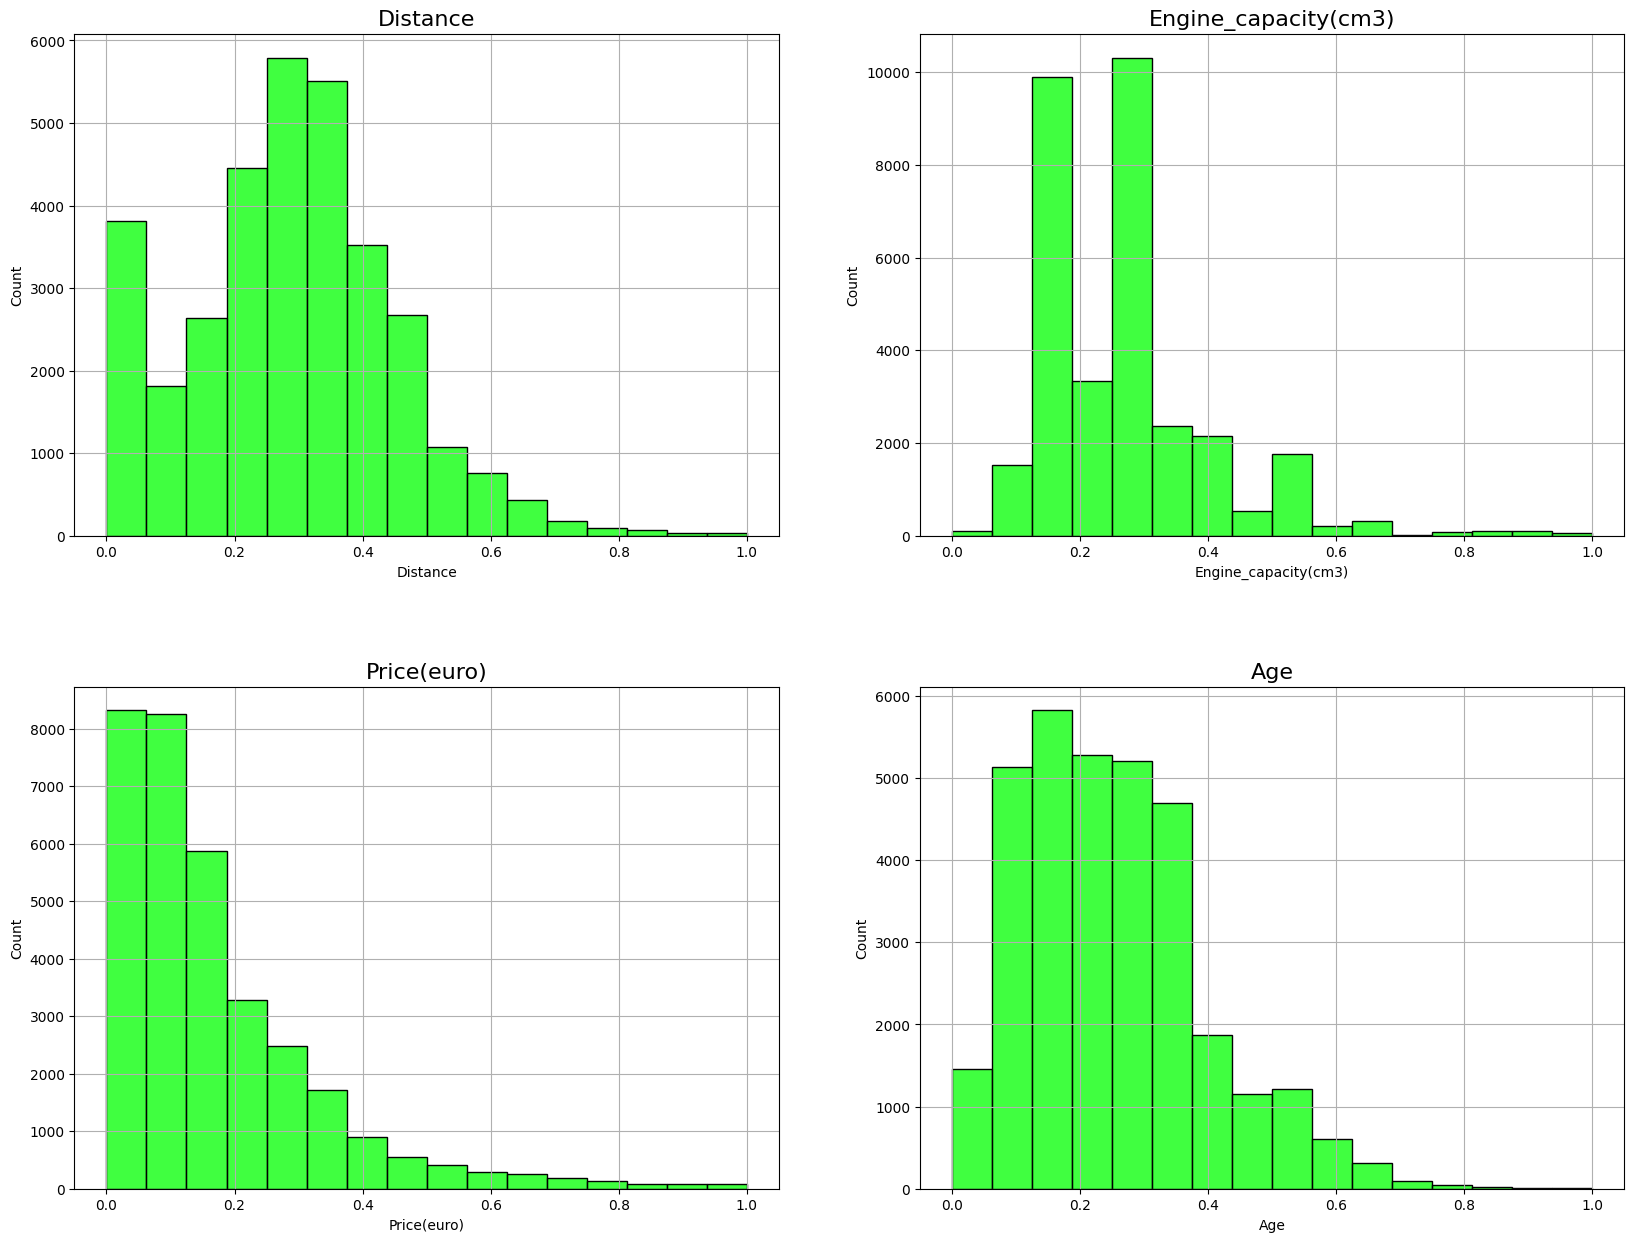

In [53]:
num=-1
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))
plt.subplots_adjust(hspace=.3)
print("Гистограмма после нормализации")

for column_name in num_columns:
    num = num+1
    x=num//2
    y=num -2*x
    hplot = sns.histplot(data=df_norm, x=column_name, bins=16, color='lime', ax=axes[x,y])
    hplot.set_title(column_name, fontsize=16)
    hplot.grid()

## Степенное преобразование

In [54]:
PowerTransform = prep.PowerTransformer().fit(df[num_columns])
scaled = PowerTransform.transform(df[num_columns])
df_pt = pd.DataFrame(scaled, columns= num_columns)
df_pt

,Distance,Engine_capacity(cm3),Price(euro),Age
0,0.311064,0.053121,0.196910,-0.245733
1,-0.258562,-0.684590,0.314116,-0.797108
2,-0.518765,-0.684590,-0.000897,-0.416694
3,0.355824,-0.413295,-0.532939,0.475051
4,1.189461,0.769170,-0.709667,1.148078
...,...,...,...,...
32913,0.574587,0.053121,-0.454476,0.940857
32914,-0.752099,-0.684590,0.076796,-1.011362
32915,-2.219265,-0.684590,-0.429379,0.066070
32916,1.720679,0.440833,-0.560232,0.475051


In [55]:
# Сохранение DataFrame в файл
df_pt.to_csv('./content/cars_moldova_hw1_df_pt.csv',index=False)

Гистограмма после степенного преобразования


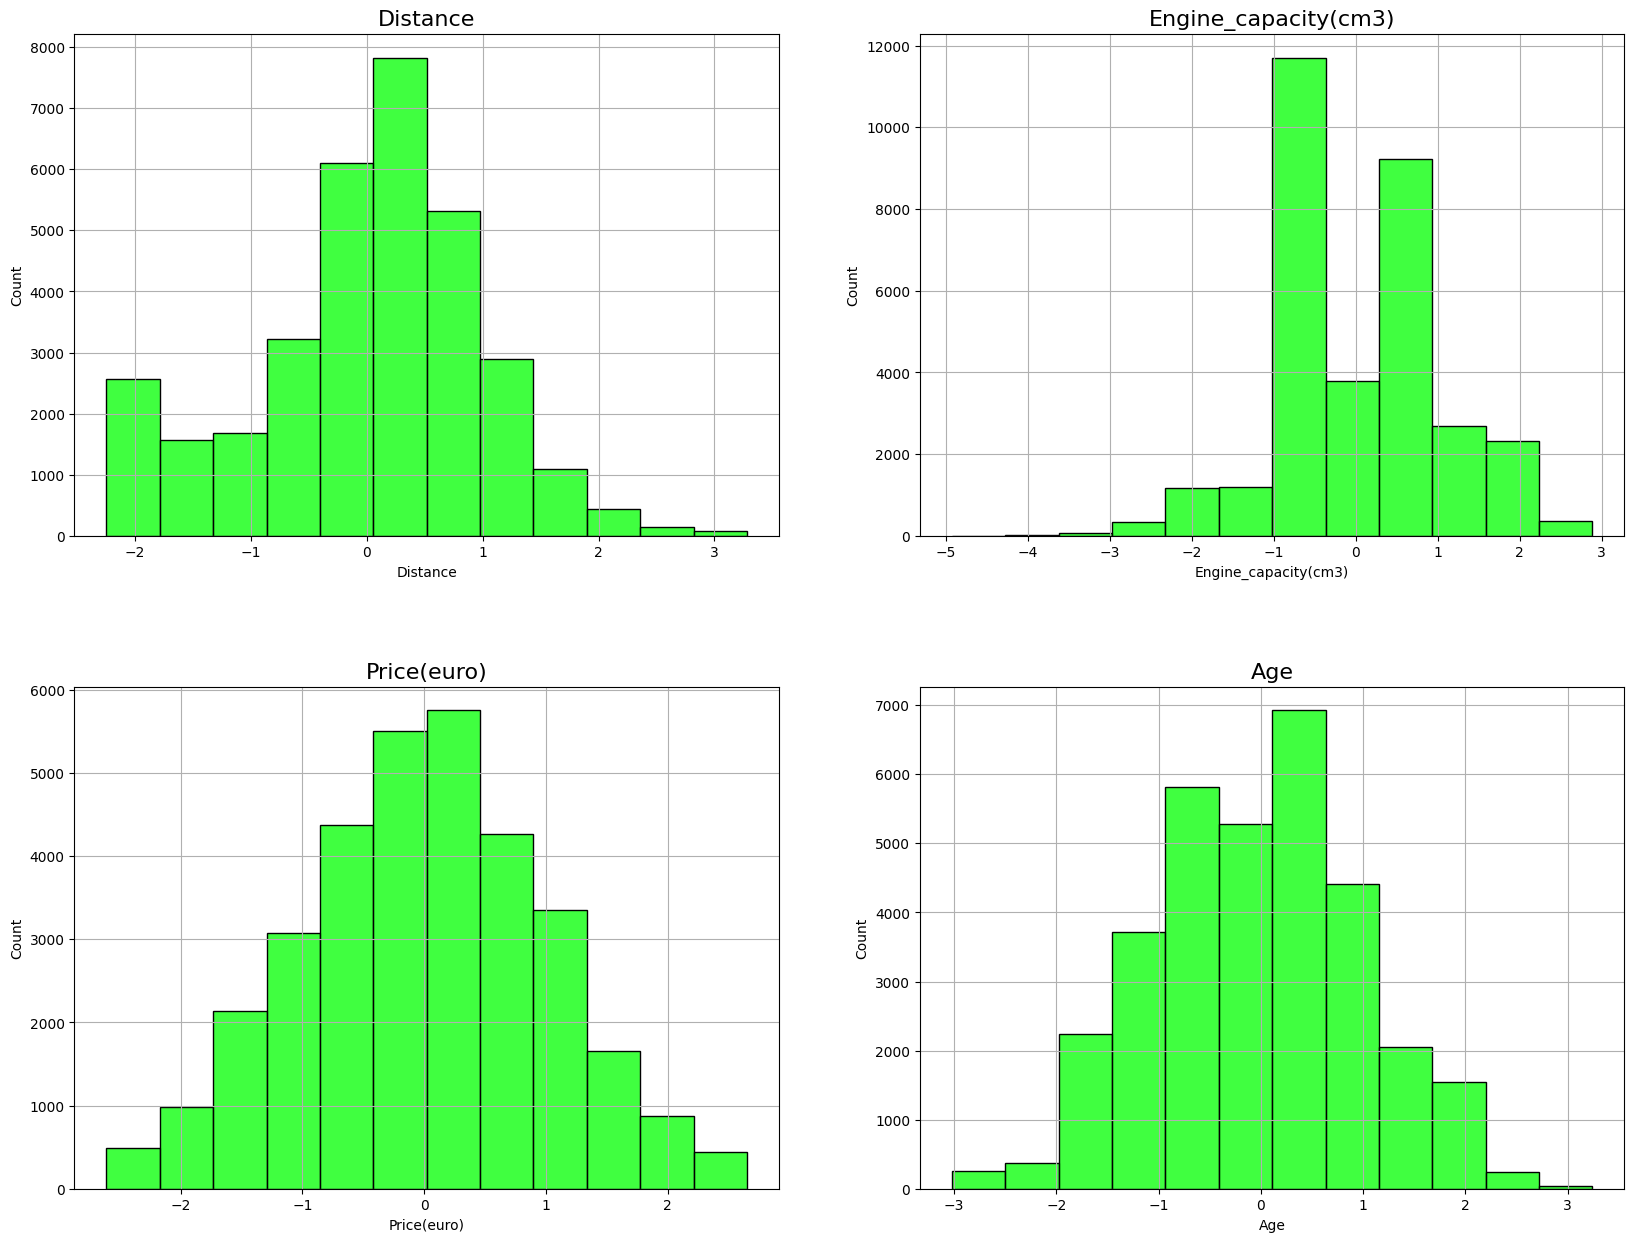

In [56]:
num=-1
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))
plt.subplots_adjust(hspace=.3)
print("Гистограмма после степенного преобразования")

for column_name in num_columns:
    num = num+1
    x=num//2
    y=num -2*x
    hplot = sns.histplot(data=df_pt, x=column_name, bins=12, color='lime', ax=axes[x,y])
    hplot.set_title(column_name, fontsize=16)
    hplot.grid()


Степенное преобразование позволило скорректировать форму распределения и привести его почти к нормальному.
